In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/creditcardfraud/creditcard.csv


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
data=pd.read_csv("creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [54]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [55]:
data.isnull().sum().sum()

0

In [56]:
data.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


0    284315
1       492
Name: Class, dtype: int64
Proportion: 577.88 : 1


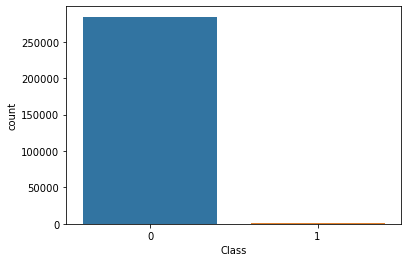

In [57]:
import seaborn as sns
print(data['Class'].value_counts())
target_count = data['Class'].value_counts()
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
sns.countplot(data['Class']);

In [58]:
count_class_0, count_class_1 = data['Class'].value_counts()
df_class_0 = data[data['Class'] == 0]
df_class_1 =data[data['Class'] == 1]

# **Random Under Sampling**

Random under-sampling:
1    492
0    492
Name: Class, dtype: int64


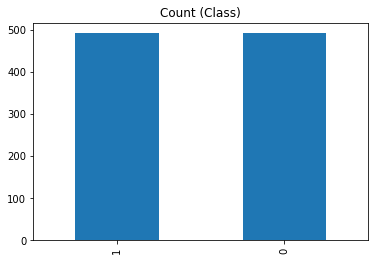

In [59]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

df_test_under.Class.value_counts().plot(kind='bar', title='Count (Class)');

In [60]:
df_test_under.shape

(984, 31)

In [61]:
X_under=df_test_under.drop(['Class'],axis=1)
y_under=df_test_under['Class']
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under,y_test_under = train_test_split(X_under,y_under,test_size=0.1)
X_train_under.shape, y_train_under.shape, X_test_under.shape

((885, 30), (885,), (99, 30))

In [62]:
random_forest_under = RandomForestClassifier(n_estimators=100)
random_forest_under.fit(X_train_under, y_train_under)
y_pred_under = random_forest.predict(X_test_under)
acc_rf_under=accuracy_score(y_test_under,y_pred_under)
prec_rf_under,recall_rf_under,f1_rf_under,support_rf_under=precision_recall_fscore_support(y_test_under, y_pred_under, average='weighted')

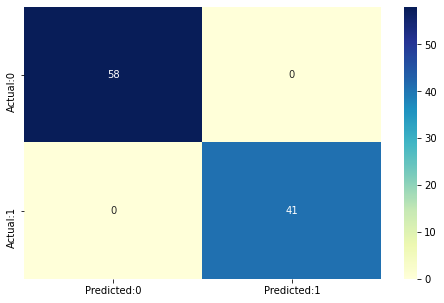

In [63]:
cm_under=confusion_matrix(y_test_under,y_pred_under)
conf_matrix_under=pd.DataFrame(data=cm_under,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_under, annot=True,fmt='d',cmap="YlGnBu")

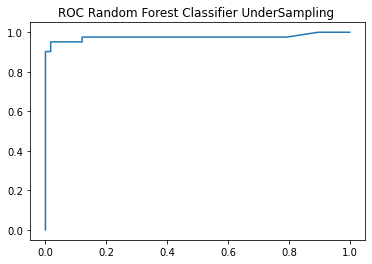

In [64]:
prob_rf_under = random_forest_under.predict_proba(X_test_under)
fpr_rf_under ,tpr_rf_under, thresh_rf_under = roc_curve(y_test_under, prob_rf_under[:,1], pos_label=1)
random_probs_rf_under = [0 for i in range(len(y_test_under))]
p_fpr_rf_under, p_tpr_rf_under, _ = roc_curve(y_test_under, random_probs_rf_under, pos_label=1)
plt.title('ROC Random Forest Classifier UnderSampling ')
plt.plot(fpr_rf_under,tpr_rf_under)
plt.show()
auc_rf_under = roc_auc_score(y_test_under, prob_rf_under[:,1])

In [65]:
print('Accuracy:',acc_rf_under, 
      '\n' 'Precison:',prec_rf_under,
     '\n' 'Recall:',recall_rf_under,
     '\n' 'F1 Score:',f1_rf_under,
     '\n' 'AUC Score:',auc_rf_under)
     

Accuracy: 1.0 
Precison: 1.0 
Recall: 1.0 
F1 Score: 1.0 
AUC Score: 0.9756097560975611


# **Random Oversampling**

Random over-sampling:
1    284315
0    284315
Name: Class, dtype: int64


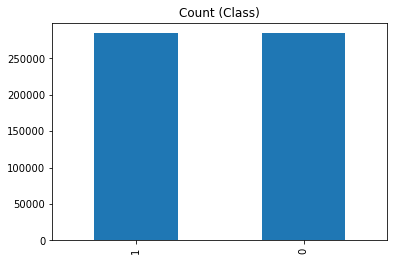

In [66]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

df_test_over.Class.value_counts().plot(kind='bar', title='Count (Class)');

In [67]:
X_over=df_test_over.drop(['Class'],axis=1)
y_over=df_test_over['Class']
from sklearn.model_selection import train_test_split

X_train_over, X_test_over, y_train_over,y_test_over = train_test_split(X_over,y_over,test_size=0.1)
X_train_over.shape, y_train_over.shape, X_test_over.shape

((511767, 30), (511767,), (56863, 30))

In [68]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_over, y_train_over)
y_pred_over = random_forest.predict(X_test_over)
acc_rf_over=accuracy_score(y_test_over,y_pred_over)
prec_rf_over,recall_rf_over,f1_rf_over,support_rf_over=precision_recall_fscore_support(y_test_over, y_pred_over, average='weighted')

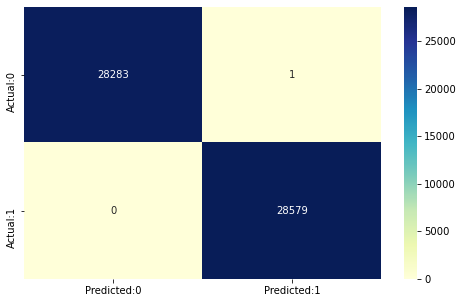

In [69]:
cm_over=confusion_matrix(y_test_over,y_pred_over)
conf_matrix_over=pd.DataFrame(data=cm_over,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_over, annot=True,fmt='d',cmap="YlGnBu")

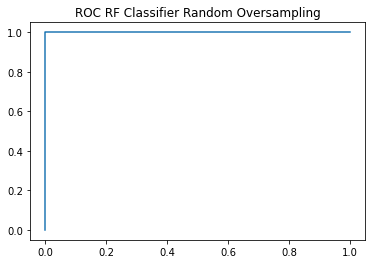

In [70]:
prob_rf_over = random_forest.predict_proba(X_test_over)
fpr_rf_over ,tpr_rf_over, thresh_rf_over = roc_curve(y_test_over, prob_rf_over[:,1], pos_label=1)
random_probs_rf_over = [0 for i in range(len(y_test_over))]
p_fpr_rf_over, p_tpr_rf_over, _ = roc_curve(y_test_over, random_probs_rf_over, pos_label=1)
plt.title('ROC RF Classifier Random Oversampling')
plt.plot(fpr_rf_over,tpr_rf_over)
plt.show()
auc_rf_over = roc_auc_score(y_test_over, prob_rf_over[:,1])

In [71]:
print('Accuracy:',acc_rf_over, 
      '\n' 'Precison:',prec_rf_over,
     '\n' 'Recall:',recall_rf_over,
     '\n' 'F1 Score:',f1_rf_over,
     '\n' 'AUC Score:',auc_rf_over)

Accuracy: 0.9999824138719379 
Precison: 0.9999824144872677 
Recall: 0.9999824138719379 
F1 Score: 0.9999824138703278 
AUC Score: 1.0
